In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Style, init
init()

### **Q.13**

In [3]:
df_13 = pd.read_parquet('../data/raw/parquets/Q_13_data.parquet')
df_13.head()

,player_id,plays
0,192013,right-handed
1,273680,right-handed
2,77223,right-handed
3,88992,right-handed
4,248846,right-handed


In [4]:
print(set(df_13['plays']))

{None, 'right-handed', 'left-handed'}


In [5]:
print(len(df_13) - (133+1013))

1498


In [6]:
right_handed_count = list(df_13['plays']).count('right-handed')
left_handed_count = list(df_13['plays']).count('left-handed')

print(right_handed_count, left_handed_count)

1013 133


In [7]:
left_handed_percentage = (left_handed_count/(right_handed_count+left_handed_count))*100
print(left_handed_percentage)

11.605584642233858


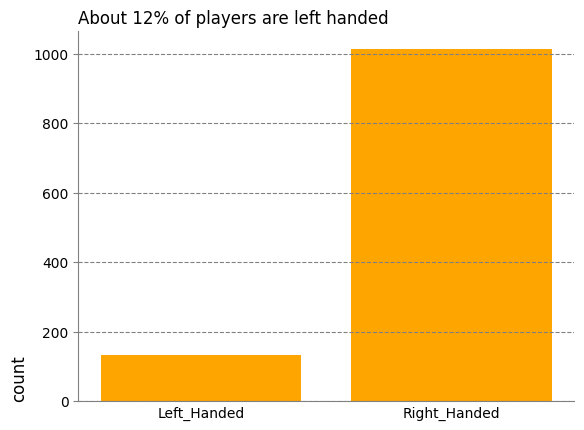

In [8]:
fig, ax = plt.subplots()
ax.bar(['Left_Handed', 'Right_Handed'], [left_handed_count, right_handed_count], color = 'orange')
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('gray')
ax.set_ylabel('count', loc = 'bottom', size = 'large')
ax.set_title('About 12% of players are left handed', size = 'large', loc = 'left')
ax.set_yticks(np.arange(0, 1100, 200))
ax.grid(axis = 'y', color = 'gray', linestyle = '--')
ax.tick_params(axis = 'x', length = 0)
ax.tick_params(color = 'gray')

### **Q.14**

In [9]:
df_tournament = pd.read_parquet('../data/raw/parquets/match_tournament.parquet', engine = 'pyarrow')
df_tournament.head()

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11974049,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6905,None,NaN,False,False,False,False,0,2.0
1,11974052,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6909,None,NaN,False,False,False,False,0,2.0
2,11974053,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6907,None,NaN,False,False,False,False,0,2.0
3,11974065,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6903,None,NaN,False,False,False,False,0,2.0
4,11974066,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6909,None,NaN,False,False,False,False,0,2.0


In [10]:
Q_14_data = np.array(df_tournament['ground_type'])
Q_14_data

array([None, None, None, ..., 'Red clay', 'Red clay', 'Red clay'],
      shape=(16873,), dtype=object)

In [11]:
print(set(Q_14_data))

{None, 'Hardcourt outdoor', 'Red clay indoor', 'Hardcourt indoor', 'Grass', 'Red clay', 'Synthetic outdoor', 'Green clay', 'Carpet indoor'}


In [12]:
print(len(Q_14_data), list(Q_14_data).count(None))

16873 248


In [13]:
Q_14_data_filtered = Q_14_data[Q_14_data != None]

Text(0.0, 1.0, 'Hardcourt outdoor is the most common type of ground')

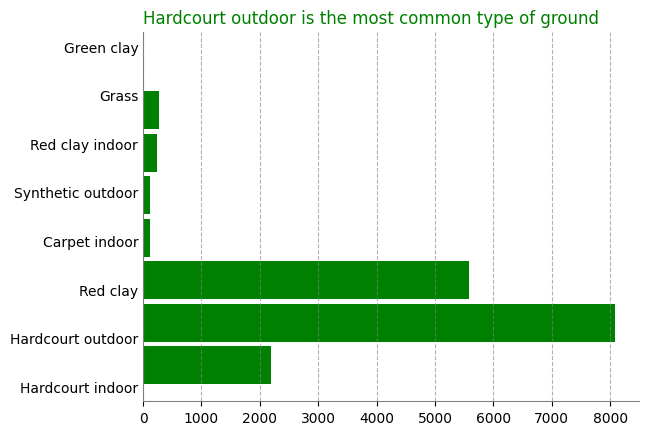

In [14]:
fig, ax = plt.subplots()
ax.hist(Q_14_data_filtered, orientation = 'horizontal', rwidth = 0.9, color = 'green', bins = 8)
ax.tick_params(axis = 'y', length = 0)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('gray')
ax.grid(axis = 'x', color = 'gray', linestyle = '--', alpha = 0.6)
ax.set_title('Hardcourt outdoor is the most common type of ground', color = 'green', loc = 'left')

### **Q.15**

In [15]:
Q_15_data = pd.read_parquet('../data/raw/parquets/Q_15_data.parquet', engine = 'pyarrow')
countries = list(Q_15_data['countries'])
print(countries, len(countries))

['Czech Republic', 'Portugal', 'Morocco', 'New Caledonia', 'Malta', 'Germany', 'Ukraine', 'Netherlands', 'Indonesia', 'Poland', 'Andorra', None, 'Romania', 'Hungary', 'Thailand', 'Belgium', 'Monaco', 'Lebanon', 'USA', 'United Kingdom', 'Croatia', 'Uruguay', 'Norway', 'Scotland', 'Canada', 'Lithuania', 'Hong Kong', 'Sri Lanka', 'Israel', 'Paraguay', 'Argentina', 'Slovakia', 'Austria', 'Italy', 'Malaysia', 'South Africa', 'Estonia', 'Burundi', 'Cyprus', 'Belarus', 'United Arab Emirates', 'New Zealand', 'Bahamas', 'Egypt', 'Antigua and Barbuda', 'Senegal', 'Syria', 'China', 'England', 'Dominican Republic', 'Georgia', 'Ecuador', 'Liechtenstein', 'Jamaica', 'Greece', 'Vietnam', 'Qatar', 'Kazakhstan', 'Philippines', 'Zimbabwe', 'Bulgaria', 'France', 'Brazil', 'Uzbekistan', 'Russia', 'Peru', 'Pakistan', 'Australia', 'Algeria', 'Sweden', 'Bosnia & Herzegovina', 'Singapore', 'Iran', 'Finland', 'Ireland', 'Jordan', 'Chile', 'Ivory Coast', 'Mexico', 'Bahrain', 'Moldova', 'Latvia', 'Slovenia', 'Tu

In [16]:
print(f'***** There are {len(countries)} distinct countries in the dataset.')

***** There are 109 distinct countries in the dataset.


### **Q.16**

### **Q.17**

In [17]:
Q_17_data = pd.read_parquet('../data/raw/parquets/Q_17_data.parquet', engine = 'pyarrow')
Q_17_data.head()

,match_id,break_occurred
0,11998445,False
1,11998445,False
2,11998445,False
3,11998445,False
4,11998445,True


In [18]:
match_count = len(set(Q_17_data['match_id']))
print(match_count)

11121


In [21]:
break_list = list(Q_17_data['break_occurred'])
break_count = break_list.count(True)
print(break_count)

77098


In [23]:
mean_breaks_per_match = break_count/match_count
print('The average number of breaks per match is :', round(mean_breaks_per_match, 2))

The average number of breaks per match is : 6.93
